<h1><center>Машинное обучение</center></h1>

#### Основные определения

`Алгоритм машинного обучение (Machine learning algorithm)`, `класс A`  - компьютерная программа обучающаяся при решении задачи из класса `T`, если ее производительность, согласно метрике `P`, улучшается при накоплении опыта `E`.

Основные задачи машинного обучения - `класс T`:

1) `Классификация` – отнесение объекта к одной из категорий на основании его признаков;
2) `Регрессия` – прогнозирование количественного признака объекта на основании прочих его признаков;
3) `Кластеризация` – разбиение множества объектов на группы на основании признаков этих объектов так, чтобы внутри групп объекты были похожи между собой, а вне одной группы – менее похожи;
4) `Детекция аномалий` – поиск объектов, "сильно непохожих" на все остальные в выборке либо на какую-то группу объектов;

...

В зависимости от входных данных обучение разделяется на:

1) `С учителем (Supervised)`;
2) `Без учителя (Unsupervised)`.

Метрики - `класс P`:

Простейшая метрика - `accuracy`, доля правильных прогнозов.

#### Дерево решений

`Дерево решений` - алгоритм решения задач классификации и регрессии.

Плюсы (+):

1) Интерпретируемость;
2) Быстрое обучение и прогнозирование;
3) Малое число параметров модели;
4) Поддержка признаков разных типов.

Минусы (-):
    
1) Легко переобучить;
2) Чувствительны к шумам;
3) Простая разделяющая гиперплоскость перпендикулярная одной из осей;
4) Нестабильность прогнозов;
5) Проблема поиска оптимального дерева;
6) Чувствительный к пропускам

Как строится:

На каждом шаге задаётся вопрос, который максимально полно делит данные на подгруппы, то есть повышает информативность.

Например: при угадывании личности, вопрос про пол намного лучше даёт нам информацию, чем вопрос про возраст.

`Энтиропия Шеннона` - степень хаоса систесы, чем она выше, тем менее неупорядоченная система.

Для системы с $N$ возможными состояниями:

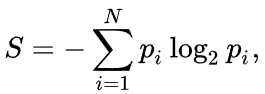

где $p_i$ – вероятности нахождения системы в $i$-ом состоянии.

`Прирост информации (Information gain)` - обратная величина энтропии, отвечает за упорядоченность системы.

Дерево задаёт вопрос так, чтобы прирост информации был максимальным.

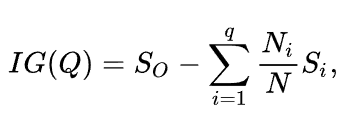

где $q$ – число групп после разбиения, $N_i$ – число элементов выборки, у которых признак $Q$ имеет $i$-ое значение, а $S$ соответствующая энтропия.

Условие окончания алгоритма заканчивается: 

1) Энтропия = 0;
2) Энтропия достигает поставленного заданного значения.

Критерии качества разбиения дерева в задачах классификации:

`Неопределенность Джини (Gini impurity)`

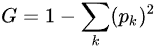

Максимизацию этого критерия можно интерпретировать как максимизацию числа пар объектов одного класса, оказавшихся в одном поддереве. Почти одинаков по производительности с критерием энтропии.

`Ошибка классификации (Misclassification error)`

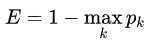

В случае задачи бинарной классификации ($p_+$ – вероятность объекта иметь метку +). Почти не используется на практике.

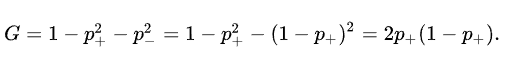

#### Практическая часть классификации при помощи дерева решений

Установим модуль в пространство для отображения графика дерева решений:

In [1]:
!pip install pydot 

Импортируем необходимые модули:

`sklearn.pipeline` - модуль для работы с пайплайнами;

- `Pipeline` - пайплайн;

`sklearn.datasets` - модуль данных;

- `load_digits` - набор картинок MNIST;

`sklearn.metrics` - модуль метрик;

- `accuracy_score` - метрика accuracy;

`sklearn.preprocessing` - модуль преобразования данных;

- `StandardScaler` - нормализация данных;

`sklearn.neighbors` - модуль KNN алгоритма;

- `KNeighborsClassifier` - KNN модель;

`sklearn.ensemble` - модуль ансамблей алгоритмов;

- `RandomForestClassifier` - случайный лес;

`sklearn.tree` - модуль для работы с решающими деревьями;

- `export_graphviz` - для отображения дерева;

- `DecisionTreeClassifier` - для построения дерева;

- `DecisionTreeRegressor` - для построения дерева регрессии;

`__future__` - модуль для обратной совместимости кода со старыми версиями Python;

- `division` - вывод при целочисленным делении Python 3;

- `print_function` - формат вывода Python 3.

`sklearn.model_selection` - модуль для преобразования данных;

- `train_test_split` - разбивка данных на выборки;

- `StratifiedKFold` - кросс-валидация.

In [2]:
import warnings

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from __future__ import division, print_function
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score

from matplotlib import pyplot as plt

Настроим проект:

In [3]:
warnings.filterwarnings("ignore")
%matplotlib inline

Настроим размер графика:

In [4]:
plt.rcParams["figure.figsize"] = (12, 6)

Зададим интервал для отрисовки:

`linspace()` - создаёт массив состоящий из n элементов в данном промежутке, включая границы.

In [5]:
points = np.linspace(0, 1, 50)

Визуализируем графики разных критериев:

`legend()` - устанавливает легенды графику.

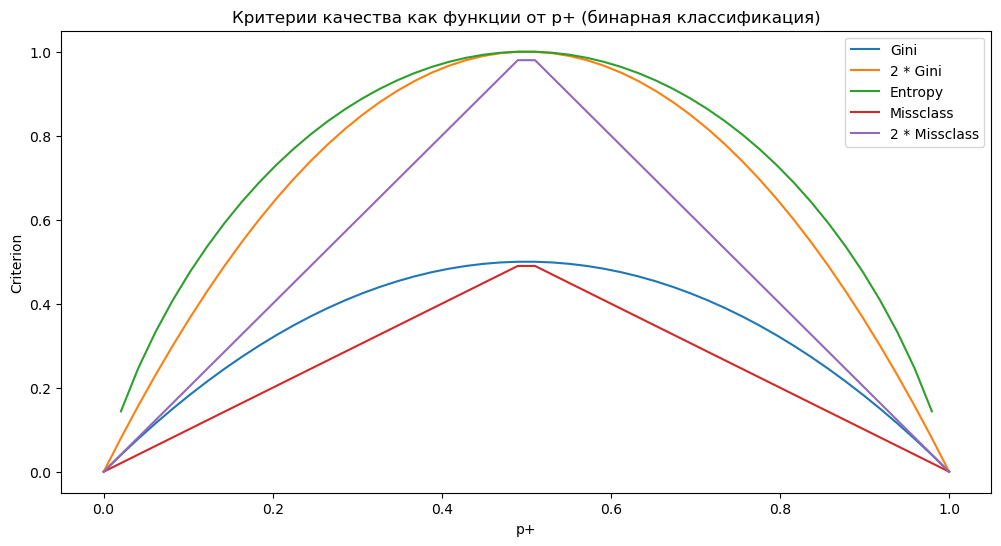

In [6]:
plt.plot(points, [2 * x * (1-x) for x in points], label="Gini")
plt.plot(points, [4 * x * (1-x) for x in points], label="2 * Gini")
plt.plot(points, [-x * np.log2(x) - (1-x) * np.log2(1 - x)  for x in points], label="Entropy")
plt.plot(points, [1 - max(x, 1-x) for x in points], label="Missclass")
plt.plot(points, [2 - 2 * max(x, 1-x) for x in points], label="2 * Missclass")

plt.xlabel("p+")
plt.ylabel("Criterion")
plt.title("Критерии качества как функции от p+ (бинарная классификация)")

plt.legend();

Пример дерева решений из модуля `Scikit-learn`:

`random.seed()` - установка сета случайных чисел (каждый раз будут одни и те же числа);

`random.normal()` - создаёт набор случайных чисел заданной размерности;

- `size=` - размерности возвращаемой матрицы;

- `loc=` - центр используемого распределения (mean).

`random.zeros()` - возвращает массив нулей;

`random.r_()` - слияние матриц по строкам.

Для начала установим пресет рандомайзера:

In [7]:
np.random.seed(7)

Дальше создадим данные для примера:

In [8]:
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

Рассмотрим наши обучающие данные:

`range()` - размер осей графика.

`c=` - классы точек;

`s=` - размер объекта на графике;

`cmap=` - карта цветов;

`edgecolors=` - цвет обводки объектов;

`linewidth=` - толщина обводки объектов.

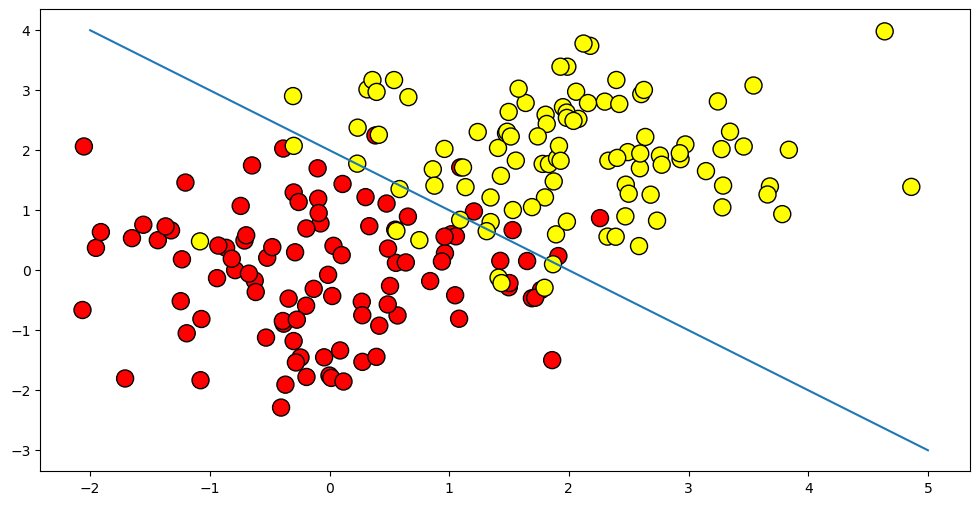

In [9]:
plt.scatter(
            train_data[:, 0],  # X
            train_data[:, 1],  # Y
            c=train_labels,
            s=150,  
            cmap="autumn", 
            edgecolors="black", 
            linewidth=1
           );

plt.plot(
            range(-2, 6), 
            range(4, -4, -1)
        );

Создадим вспомогательную функцию для фиксирования области отображения объектов:

`meshgrid()` - преобразует список в вектор координат;

`arange()` - создаёт список элементов.

In [10]:
def get_space(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(
                                                                y_min, 
                                                                y_max, 
                                                                0.01
                                                               )
                      )

Создадим модель дерева:

`DecisionTreeClassifier()` - создание дерева классификации;
- `criterion=` - критерий для классификации;
- `max_depth=` - максимальная глубина дерева;
- `random_state=` - пресет рандомности разбиения.

In [11]:
clf_tree = DecisionTreeClassifier(
                                    criterion="entropy", 
                                    max_depth=3, 
                                    random_state=17
                                 )

Обучим дерево:

`fit()` - обучение модели.

In [12]:
clf_tree.fit(train_data, train_labels)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)

Подготовим данные:

`predict()` - прогнозирование данных моделью;

`c_` - строчная конкатенация;

`ravel()` - объединяет в один массив все данные;

`reshape()` - изменяет размерность структуры данных.

In [13]:
xx, yy = get_space(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

Отобразим данные:

`pcolormesh()` - график цветовых областей.

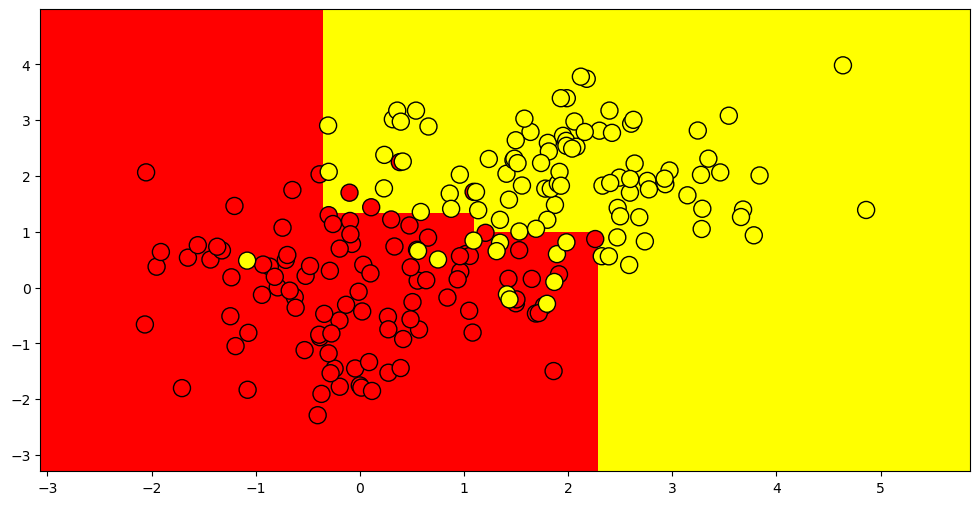

In [14]:
plt.pcolormesh(
                xx, 
                yy, 
                predicted, 
                cmap="autumn"
              )

plt.scatter(
            train_data[:, 0], 
            train_data[:, 1], 
            c=train_labels, 
            s=150, 
            cmap="autumn", 
            edgecolors="black", 
            linewidth=1
           );

Отобразим само дерево:

`export_graphviz` - создаёт визуализацию решающего дерева;

- `our_file=` - название графика;
- `feature_names=` - название признаков;
- `filled=` - вывод частоты класса.

In [15]:
export_graphviz(
                clf_tree, 
                feature_names=["x1", "x2"], 
                out_file="small_tree.dot", 
                filled=True
               )

!dot -Tpng "small_tree.dot" -o "small_tree.png"

Итог:

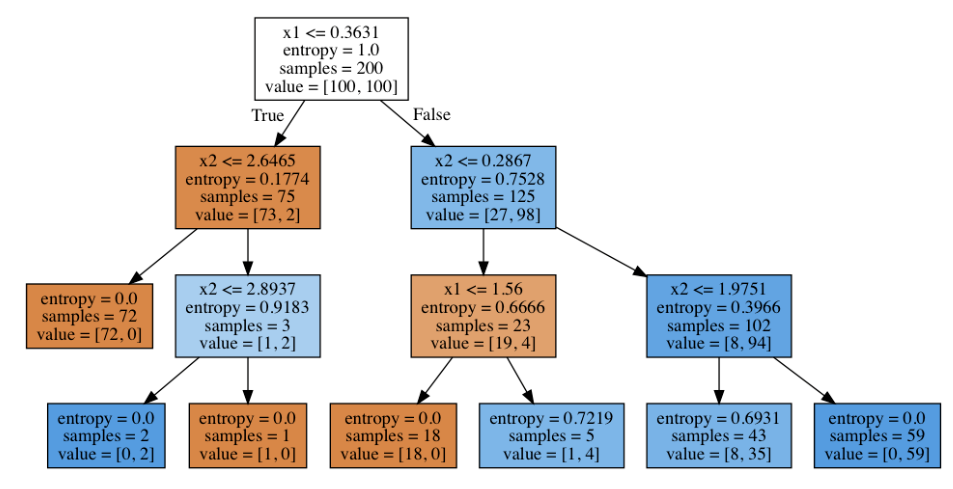

Дерево решений ищет наилучшее значение для разбиения признаков по метрике.

Создадим данные для дальнейшей работы:

In [16]:
data = pd.DataFrame(
                    {
                     "Возраст": [17, 64, 18, 20, 38, 49, 55, 25, 29, 31, 33], 
                     "Невозврат кредита": [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1]
                    }
                   )

Посмотрим на созданный DataFrame:

In [17]:
data.head()

,Возраст,Невозврат кредита
0,17,1
1,64,0
2,18,1
3,20,0
4,38,1


Создадим дерево решений:

In [18]:
age_tree = DecisionTreeClassifier(random_state=17)

Обучим дерево решений:

`reshape()` - изменяет размерность структуры данных.

In [19]:
age_tree.fit(
                data["Возраст"].values.reshape(-1, 1),
                data["Невозврат кредита"].values
            )

DecisionTreeClassifier(random_state=17)

Создадим график нашего дерева решений:

In [20]:
export_graphviz(
                age_tree, 
                feature_names=["Возраст"], 
                out_file="age_tree.dot", 
                filled=True
               )

!dot -Tpng "age_tree.dot" -o "age_tree.png"

Деление дерева происходит по среднему значению признака, переходя значение которого значение целевой переменной меняется.

Добавим к нашим данным ещё один количественный признак:

In [21]:
data["Зарплата"] = pd.Series([25, 80, 22, 36, 37, 59, 74, 70, 33, 102, 88])

Посмотрим на обновлённые данные:

In [22]:
data.head()

,Возраст,Невозврат кредита,Зарплата
0,17,1,25
1,64,0,80
2,18,1,22
3,20,0,36
4,38,1,37


Создадим дерево решений для обновлённых данных:

In [23]:
age_sal_tree = DecisionTreeClassifier(random_state=17)

Обучим новое дерево:

In [24]:
age_sal_tree.fit(
                    data[["Возраст", "Зарплата"]].values,
                    data["Невозврат кредита"].values
                );

Создадим схему нашего нового дерева решений:

In [25]:
export_graphviz(
                age_sal_tree, 
                feature_names=["Возраст", "Зарплата"], 
                out_file="age_sal_tree.dot", 
                filled=True
               )

!dot -Tpng "age_sal_tree.dot" -o "age_sal_tree.png"

Дерево поочерёдно делит данные по признакам.

Если данных много, то строятся деревья глубинной 1 и рассматривается прирост информации. После чего выбирается топ $N$ по приросту информации для построения деревьев.

Случаи достроения дерева до максимальной глубины:

* `Случайный лес (Random forest)` - это алгоритм машинного обучуения, который строит ансамбль деревьев максимальной глубины, результатом которого является обобщающее дерево;

* `Стрижка дерева (Pruning tree)` - это процесс поэтапного откидывания слоёв построенного дерева решений.

Способы борьбы с переобучением дерева решений:

* Стрижка дерева;

* Ограничение глубины дерева.

Основные параметра дерева решения:

`max_depth=` - максимальная глубина дерева;

`max_features=` - максимально учитываемое количество признаков;

`min_samples_leaf=` - минимальное количество объектов в листе.

#### Практическая часть регрессии при помощи дерева решений

Критерии качества при построении регрессионого дерева решений:

`Дисперсия вокруг среднего`:

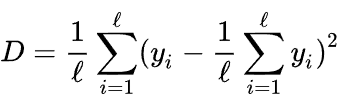

Пример:

In [26]:
n_train = 150        
n_test = 1000       
noise = 0.1

Функция вычисления точек:

In [27]:
def our_function(x):
    x = x.ravel()
    
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

Функция генерации данных:

In [28]:
def generate(n_samples, noise):
    
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2) + \
        np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    
    return X, y

Подготавливаем данные для расчётов:

In [29]:
X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

Создаём модель:

In [30]:
reg_tree = DecisionTreeRegressor(max_depth=5, random_state=17)

Обучаем модель:

In [31]:
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=17)

Прогнозируем:

In [32]:
reg_tree_pred = reg_tree.predict(X_test)

`xlim()` - ограничения по оси X.

`lw=` - ширина линии.

Отображаем результаты:

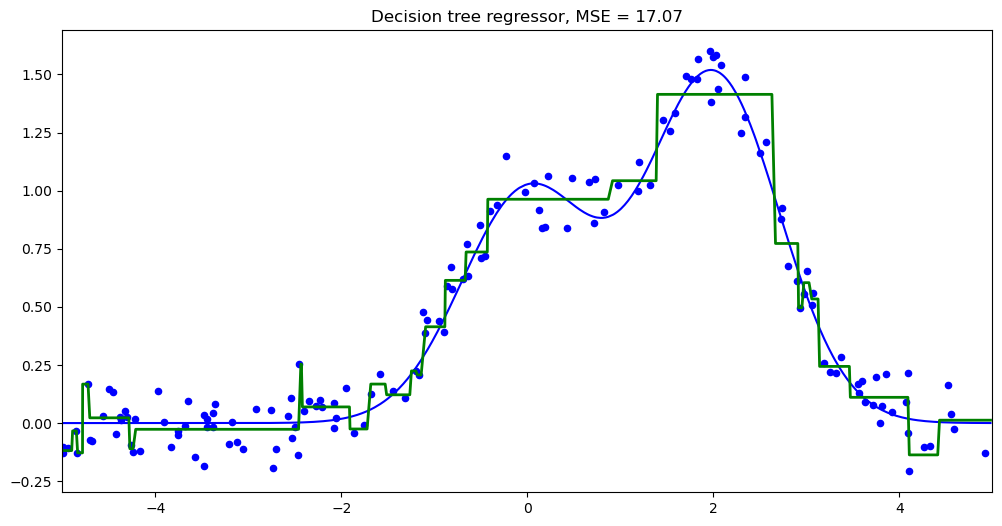

In [33]:
plt.plot(X_test, our_function(X_test), "b")

plt.scatter(X_train, y_train, c="b", s=20)

plt.plot(X_test, reg_tree_pred, "g", lw=2)

plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % np.sum((y_test - reg_tree_pred) ** 2))
plt.show()

Дерево регрессий апроксимирует линейную функцию под кусочно-постоянную.

#### Метод ближайших соседей

`Метод ближайших соседей KNN` - это метрический алгоритм машинного обучения, который используется в классификации и в регрессии, путём нахождения искомого путём сравнения с максимально похожими объектами выборки.

Принцип работы knn соседей при классификации:

* Вычисляется расстояние до каждого объекта выборки;
* Отбирается $k$ ближайших соседей;
* Ставится класс для объекта, который чаще всего встречается у ближайших отобранных соседей.

Принцип работы knn соседей при регрессии:

* Вычисляется расстояние до каждого объекта выборки;
* Отбирается $k$ ближайших соседей;
* Выбирается среднее (медианное) число целевого признака среди соседей.

Данный алгоритм явлвяется ленивым, то есть вычисления происходят при определении класса/целевого значения объекта.

Использование KNN метода:

* В kNN может послужить хорошим baseline в решении задачи;
* В Kaggle kNN используется для построения мета-признаков (прогноз kNN подается на вход прочим моделям) или в стекинге/блендинге;
* В рекомендательных системах начальным решением может быть рекомендация какого-то товара, популярного среди ближайших соседей человека, которому хотим сделать рекомендацию;
* На практике для больших выборок пользуются приближенными методами поиска ближайших соседей.

Параметры KNN:

* Число соседей;
* Метрика расстояния между объектами (метрика Хэмминга, Евклидово расстояние, Косинусное расстояние, Расстояние Минковского). Отметим, что при использовании большинства метрик значения признаков надо масштабировать;
* Веса соседей.

Плюсы (+):
1) Простая реализация;
2) Хорош как baseline;
3) Подходит для многих задач;
4) Неплохая интерпретация.

Минусы (-):
1) Медленный при большом количестве объектов;
2) При большом количестве признаков усложняется работа в разы;
3) Зависимость от метрики расстояния;
4) Нет основания для выбора количества соседей.

#### Практическая часть применения KNN

Параметры модели:

`weights`: `"uniform"` (все веса равны), `"distance"` (вес обратно пропорционален расстоянию до тестового примера), пользовательская функция - веса расстояний;

`algorithm` (опционально): `"brute"` (перебор), `"ball_tree"` (дерево соседей), `"KD_tree"` (дерево соседей), `"auto"` (автоматически выбор).

`leaf_size` (опционально) - порог переключения на полный перебор в случае выбора `BallTree` или `KDTree` для нахождения соседей;

`metric`: `"minkowski"`, `"manhattan"`, `"euclidean"`, `"chebyshev"`, ... - используемая метрика расстояний.

Способы проверки качества модели:

* `отложенная выборка (held-out/hold-out set)` - разбиение на обучающую/тестовую/валидационную выборки;
* `кросс-валидация (cross-validation)` - разбиение на K частей, каждая из котороый в отдельном случае выступает тестовой, результирующий ответ основывается на среднем значении метрики.

K-fold cross-validation:

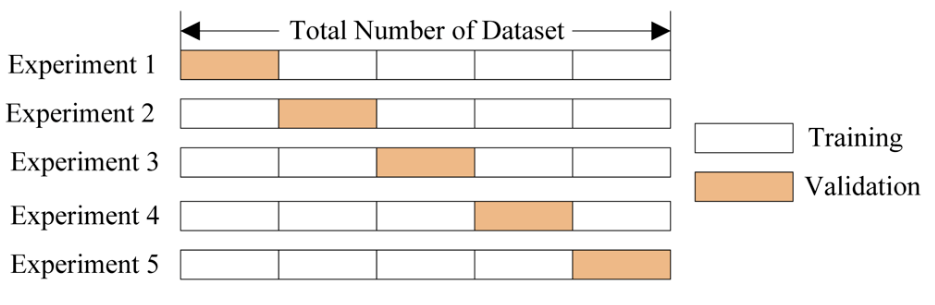

Минус:
- много затрат по времени на вычисления.

#### Практическая часть

Загрузим данные:

In [34]:
dataframe = pd.read_csv("telecom_churn.csv")

Посмотрим на них:

In [35]:
dataframe.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Выведем подробную информацию о dataframe-е:

In [36]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

Разделим данные для разных обучений моделей:

`factorize()` - метод возвращающий двустрочный массив чисел значений и сами уникальные значения.

In [37]:
states = pd.Series(dataframe["State"])
targets = dataframe["Churn"].astype("int")

In [38]:
dataframe.drop(["State", "Churn"], axis=1, inplace=True)

In [39]:
dataframe["Voice mail plan"] = pd.factorize(dataframe["Voice mail plan"])[0]
dataframe["International plan"] = pd.factorize(dataframe["International plan"])[0]

Подготовка данных:

`.values` - возвращает значения dataframe-а с помощью numpy;

`train_test_split()` - функция разбивает данные на тренировочную и тестовую выборки;

`test_size=` - доля тестовых данных.

In [40]:
x_train, x_test, y_train, y_test = train_test_split(
                                                    dataframe.values, 
                                                    targets, 
                                                    test_size=0.3, 
                                                    random_state=17
                                                   )

Создадим модельки:

In [41]:
tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)

Обучим модельки на наших тренировочных данных:

In [42]:
tree.fit(x_train, y_train)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

Спрогнозируем с помощью моделей:

In [43]:
tree_predict = tree.predict(x_test)
knn_predict = knn.predict(x_test)

Рассмотрим значение метрики моделей:

`accuracy_score()` - расчёт точности прогнозирования по метрике accuracy.

In [44]:
accuracy_score(tree_predict, y_test)

0.94

In [45]:
accuracy_score(knn_predict, y_test)

0.881

Подбор параметров кросс-валидацией:

`GridSearchCV` подбирает лучшие параметры путём прогонки пар значений параметров на кросс-валидациях.

In [46]:
tree_parameters = {
                    "max_depth": range(1, 11),
                    "max_features": range(4, 19)
                  }

`cv=` - количество разрезов кросс-валидации;

`n_jobs=` - количество используемых каналов/ядер;

`verbose=` - детализация поиска (1 - вывод параметров и время на вычисление, 2 - значение метрики также выводится, 3 - полная расшифровка расчётов).

In [47]:
tree_grid = GridSearchCV(
                         tree,
                         tree_parameters,
                         cv=5, 
                         n_jobs=-1,
                         verbose=True
                        )

Поиск лучших параметров:

In [48]:
tree_grid.fit(x_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'max_features': range(4, 19)},
             verbose=True)

Отображение лучших параметров:

`best_params_` - отображение лучших параметров кросс-валидации.

In [49]:
tree_grid.best_params_

{'max_depth': 6, 'max_features': 17}

Отображение значения метрики при лучших параметрах:

`best_score_` - лучшее значение метрики кросс-валидации.

In [50]:
tree_grid.best_score_

0.94257014456259

In [51]:
accuracy_score(y_test, tree_grid.predict(x_test))

0.946

Настройка `pipeline-а` для knn:

`StandardScaler()` - нормализация данных.

In [52]:
knn_pipe = Pipeline(
                    [
                        ("scaler", StandardScaler()), 
                        ("knn", KNeighborsClassifier(n_jobs=-1))
                    ]
                   )

Подбор количества соседей:

In [53]:
knn_params = {"knn__n_neighbors": range(1, 10)}

Поиск лучшего количества соседей:

In [54]:
knn_grid = GridSearchCV(
                        knn_pipe, 
                        knn_params,
                        cv=5, 
                        n_jobs=-1,
                        verbose=True
                       )

Ищем лучшие значения параметров:

In [55]:
knn_grid.fit(x_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_jobs=-1))]),
             n_jobs=-1, param_grid={'knn__n_neighbors': range(1, 10)},
             verbose=True)

Вывод лучшего параметра для дерева:

In [56]:
knn_grid.best_params_

{'knn__n_neighbors': 7}

Вывод значения метрики модели:

In [57]:
knn_grid.best_score_

0.8859867109023905

Вывод сравнения метрик:

In [58]:
accuracy_score(y_test, knn_grid.predict(x_test))

0.89

Решение случайным лесом:

`n_estimators=` - количество обучающихся деревьев.

In [59]:
forest = RandomForestClassifier(
                                n_estimators=100, 
                                n_jobs=-1, 
                                random_state=17
                               )

Среднее значение метрики дерева решений при помощи кросс-валидации:

In [60]:
print(np.mean(cross_val_score(
                                forest, 
                                x_train, 
                                y_train, 
                                cv=5
                             )
             )
     )

0.9494233119813256


Зададим параметры для поиска:

In [61]:
forest_params = {
                    "max_depth": range(1, 11),
                    "max_features": range(4, 19)
                }

Создадим модельку поиска лучших значений параметров:

In [62]:
forest_grid = GridSearchCV(
                            forest, 
                            forest_params,
                            cv=5, 
                            n_jobs=-1,
                            verbose=True
                          )

Ищем лучшие параметры:

In [63]:
forest_grid.fit(x_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'max_features': range(4, 19)},
             verbose=True)

Рассмотрим лучшие параметры случайного леса:

In [64]:
forest_grid.best_params_

{'max_depth': 9, 'max_features': 6}

Рассмотрим лучшее значение метрики случайного леса:

In [65]:
forest_grid.best_score_

0.9511372931045574

Сравним значения метрика:

In [66]:
accuracy_score(y_test, forest_grid.predict(x_test))

0.953

Нарисуем дерево:

In [67]:
export_graphviz(
                tree_grid.best_estimator_, 
                feature_names=dataframe.columns, 
                out_file="churn_tree.dot", 
                filled=True
               )

!dot -Tpng "churn_tree.dot" -o "img/churn_tree.png"

Error: Could not open "img/churn_tree.png" for writing : No such file or directory


Сложный случай для дерева решений:

In [68]:
def form_linearly_separable_data(n=500, x1_min=0, x1_max=30, x2_min=0, x2_max=30):
    
    data, target = [], []
    
    for i in range(n):
        x1, x2 = np.random.randint(x1_min, x1_max), np.random.randint(x2_min, x2_max)

        if np.abs(x1 - x2) > 0.5:
            data.append([x1, x2])
            target.append(np.sign(x1 - x2))
    
    return np.array(data), np.array(target)

Отобразим результаты:

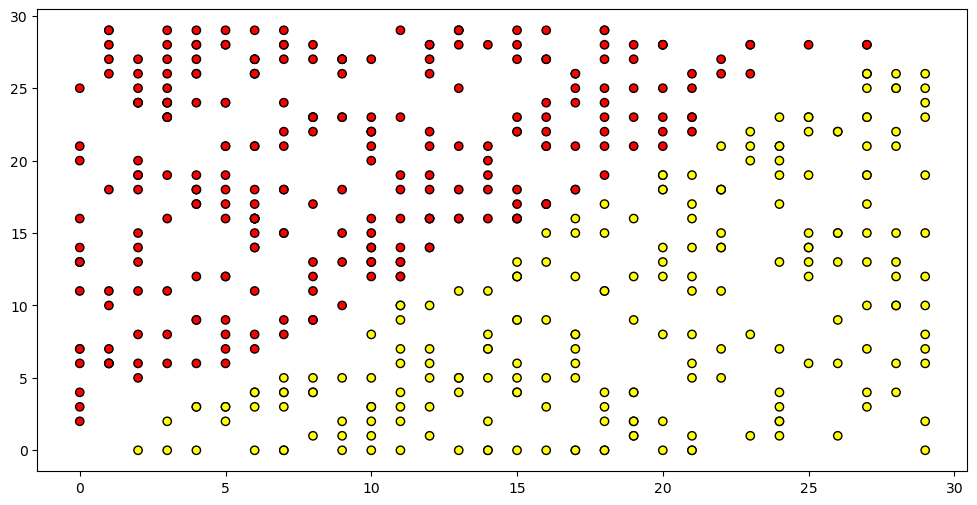

In [69]:
x, y = form_linearly_separable_data()

plt.scatter(
            x[:, 0], 
            x[:, 1], 
            c=y, 
            cmap="autumn", 
            edgecolors="black"
           );

Отрисовка границ:

Обучение модельки для данных:

In [70]:
tree = DecisionTreeClassifier(random_state=17).fit(x, y)

In [71]:
xx, yy = get_space(x)
predicted = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

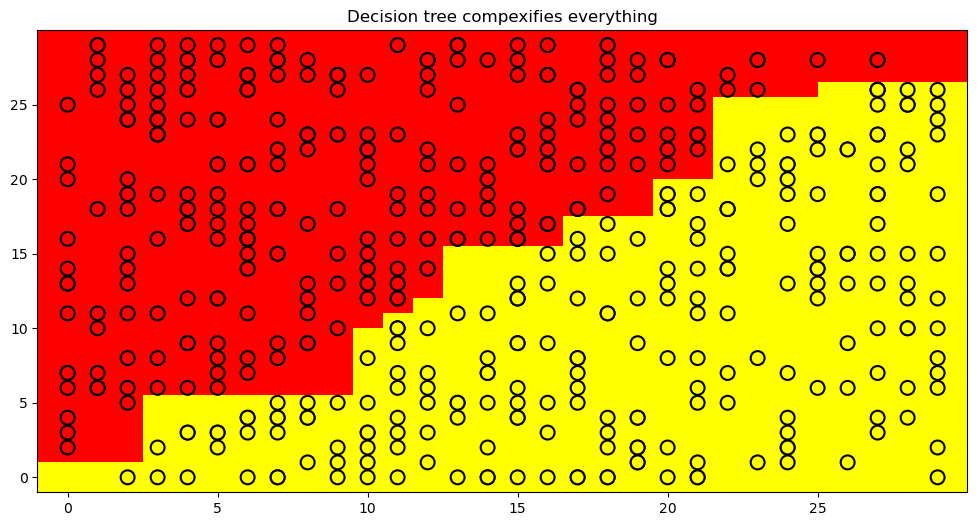

In [72]:
plt.pcolormesh(xx, yy, predicted, cmap="autumn")

plt.scatter(
            x[:, 0], 
            x[:, 1], 
            c=y, 
            s=100, 
            cmap="autumn", 
            edgecolors="black", 
            linewidth=1.5
           )

plt.title("Decision tree compexifies everything");

Нарисуем дерево решений:

In [73]:
export_graphviz(
                tree, 
                feature_names=["x1", "x2"], 
                out_file="deep_toy_tree.dot",
                filled=True
               )

!dot -Tpng "deep_toy_tree.dot" -o "deep_toy_tree.png"

#### Задача распознавания рукописных цифр MNIST

Загружаем данные:

In [74]:
data = load_digits()

Векторное представление картинок 8 на 8 пикселей:

In [75]:
data = load_digits()
x, y = data.data, data.target

x[0, :].reshape([8, 8])

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Посмотрим на картинки:

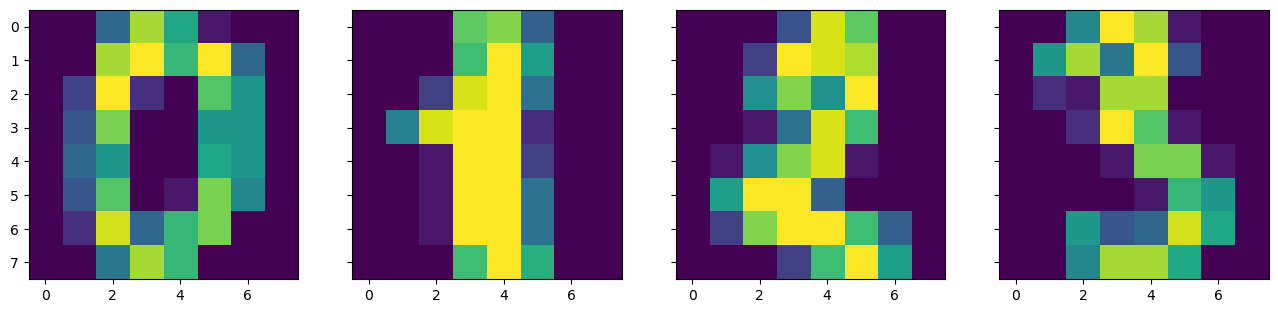

In [76]:
f, axes = plt.subplots(
                        1, 
                        4, 
                        sharey=True, 
                        figsize=(16, 6)
                      )

for i in range(4):
    axes[i].imshow(x[i, :].reshape([8, 8]));

Подготовим данные:

In [77]:
x_train, x_test, y_train, y_test = train_test_split(
                                                    x, 
                                                    y, 
                                                    test_size=0.3,
                                                    random_state=17
                                                   )

Создаём модели:

In [78]:
tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)

Обучаем их:

In [79]:
tree.fit(x_train, y_train)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

Сделаем прогнозы:

In [80]:
tree_pred = tree.predict(x_test)
knn_pred = knn.predict(x_test)

Рассмотрим качество моделей:

In [81]:
accuracy_score(y_test, knn_pred)

0.9740740740740741

In [82]:
accuracy_score(y_test, tree_pred)

0.6666666666666666

Подбор параметров кросс-валидацией;

In [83]:
tree_params = {
                "max_depth": [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
                "max_features": [1, 2, 3, 5, 10, 20 ,30, 50, 64]
              }
                
tree_grid = GridSearchCV(
                         tree,
                         tree_params,
                         cv=5, 
                         n_jobs=-1,
                         verbose=True
                        )

Обучим модельку подбора параметров:

In [84]:
tree_grid.fit(x_train, y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
                         'max_features': [1, 2, 3, 5, 10, 20, 30, 50, 64]},
             verbose=True)

Лучшие параметры:

In [85]:
tree_grid.best_params_

{'max_depth': 10, 'max_features': 50}

Оценка модели:

In [86]:
tree_grid.best_score_

0.8568203376968316

Решение методом ближайших соседей;

In [87]:
np.mean(cross_val_score(
                        KNeighborsClassifier(n_neighbors=1), 
                        x_train, 
                        y_train, 
                        cv=5)
       )

0.9864858028204642

Решение при помощи случайного леса:

In [88]:
np.mean(cross_val_score(
                        RandomForestClassifier(random_state=17), 
                        x_train, 
                        y_train, 
                        cv=5
                       )
       )

0.9753462341111744

Итого:

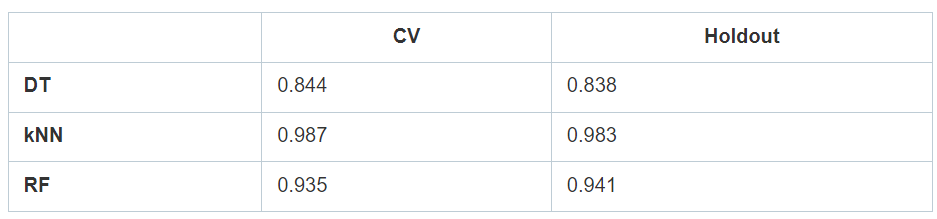

Сначала стоит проверять свои решения на простых модельках: дерево решений, knn. Позже при недостаточной точности прибегать к сложным.

Сложный случай для KNN (первый признак пропорционален целевому):

`random.choice()` - создаёт рандомный массив.

In [89]:
def form_noisy_data(n_obj=1000, n_feat=100, random_seed=17):
    np.random.seed(random_seed)
    y = np.random.choice([-1, 1], size=n_obj)
    x1 = 0.3 * y
    x_other = np.random.random(size=[n_obj, n_feat - 1])

    return np.hstack([x1.reshape([n_obj, 1]), x_other]), y

In [90]:
x, y = form_noisy_data()

Подготовим данные:

In [91]:
cv_scores, test_scores = [], []
n_neighb = [1, 2, 3, 5] + list(range(50, 550, 50))

for k in n_neighb:

    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores.append(np.mean(cross_val_score(
                                             knn, 
                                             x_train, 
                                             y_train, 
                                             cv=5
                                            )
                            )
                    )
    
    knn.fit(x_train, y_train)
    test_scores.append(accuracy_score(y_test, knn.predict(x_test)))

Построим кривые валидации:

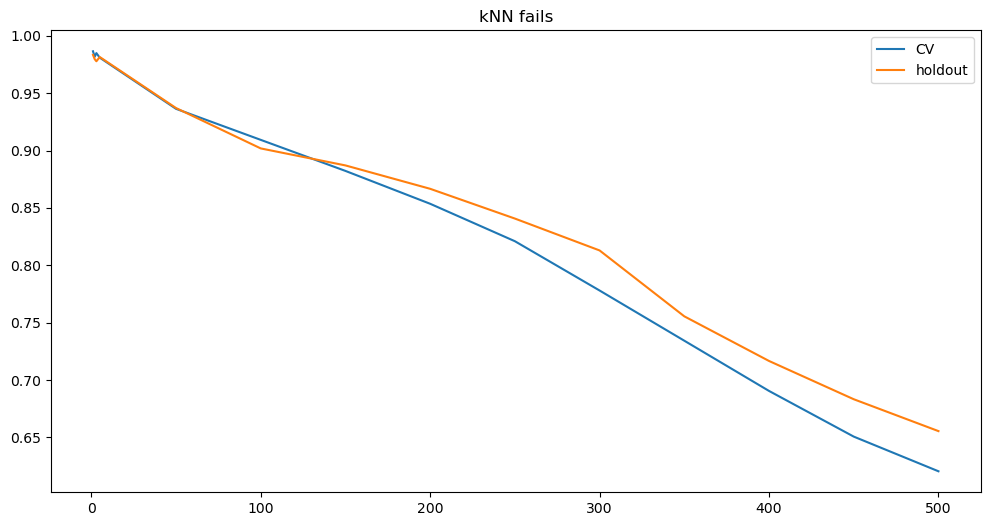

In [92]:
plt.plot(
            n_neighb, 
            cv_scores, 
            label="CV"
        )

plt.plot(
            n_neighb, 
            test_scores, 
            label="holdout"
        )

plt.title("kNN fails")
plt.legend();